<a href="https://colab.research.google.com/github/CentenoGarrido/Challenge-1-TelecomX/blob/main/Challenge_TelecomX_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importación de bibliotecas necesarias.



In [1]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt

#📌 Extracción

## Lectura y exploración del archivo.

In [2]:
url ='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

response = requests.get(url)
data = response.json()
df_original = pd.DataFrame(data)
df_original.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

## Normalizar el DataFrame.

In [4]:
datos = pd.json_normalize(data)
datos.sample(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
3542,4883-KCPZJ,No,Female,0,Yes,Yes,22,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.25,555.4
1422,2043-WVTQJ,No,Male,0,Yes,No,1,Yes,No,DSL,...,No,Yes,No,No,No,Month-to-month,No,Mailed check,55.70,55.7
3923,5364-XYIRR,Yes,Male,0,Yes,No,51,Yes,Yes,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.65,4812.75
5252,7162-WPHPM,No,Male,0,Yes,Yes,58,Yes,Yes,DSL,...,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),71.60,4230.25
5973,8165-ZJRNM,No,Female,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.75,1679.25
1736,2468-SJFLM,No,Male,0,No,No,1,Yes,No,Fiber optic,...,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.30,74.3
2785,3863-QSTYI,No,Male,0,No,No,59,Yes,No,DSL,...,No,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,64.65,3735.45
6722,9254-RBFON,Yes,Female,0,Yes,Yes,17,Yes,No,Fiber optic,...,No,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),98.60,1704.95
2013,2843-CQMEG,No,Male,0,No,No,24,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,49.70,1218.25
1494,2146-EGVDT,No,Male,0,Yes,Yes,59,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.30,1192.7


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

## Verificar valores nulos, duplicados o en blanco.

In [6]:
nulos = datos.isnull().sum()
duplicados = datos.duplicated().sum()
blancos = datos.apply(lambda x: x.astype(str).str.strip() == "").sum()

print('Valores nulos encontrados:\n' + str(nulos[nulos > 0]) if nulos.any() else 'No existen valores nulos')
print('-' * 30)
print('\nValores duplicados encontrados:\n' + str(duplicados[duplicados > 0]) if duplicados.any() else 'No existen valores duplicados')
print('-' * 30)
print('Valores en blanco encontrados:\n' + str(blancos[blancos > 0]) if blancos.any() else 'No existen valores en blanco')

No existen valores nulos
------------------------------
No existen valores duplicados
------------------------------
Valores en blanco encontrados:
Churn                    224
account.Charges.Total     11
dtype: int64


In [7]:
# Hay espacios en blanco en Churn y account.Charges.Total

# Eliminar las filas de Churn que tengan el valor: ''
print(f'Número de filas antes de eliminar Churn vacío: {len(datos)}')
datos = datos[datos['Churn'] != '']
# Comprobar el número de filas después de eliminar Churn vacío
print(f'Número de filas después de eliminar Churn vacío: {len(datos)}')

# y convertir account.Charges.Total a numérico
datos['account.Charges.Total'] = pd.to_numeric(datos['account.Charges.Total'], errors='coerce').replace(np.nan, 0).astype(float)
print('-' * 55)
print(f"\nNuevo tipo de datos de account.Charges.Total: {datos['account.Charges.Total'].dtype}")
print('-' * 55)

#Volver a revisar si existen valores en blanco
blancos = datos.apply(lambda x: x.astype(str).str.strip() == "").sum()
print('\nValores en blanco encontrados:\n' + str(blancos[blancos > 0]) if blancos.any() else 'No existen más valores en blanco')

Número de filas antes de eliminar Churn vacío: 7267
Número de filas después de eliminar Churn vacío: 7043
-------------------------------------------------------

Nuevo tipo de datos de account.Charges.Total: float64
-------------------------------------------------------
No existen más valores en blanco


## Agregar nueva columna "account_Charges_Daily"

In [8]:
datos['account.Charges.Daily'] = round(datos['account.Charges.Monthly']/30.42,2)
datos[['account.Charges.Daily','account.Charges.Monthly']].sample(5)

,account.Charges.Daily,account.Charges.Monthly
236,3.28,99.90
4427,1.88,57.20
6666,2.77,84.15
3529,3.82,116.25
858,3.57,108.45


##Verificar si las columnas tienen valores únicos.

In [9]:
print('Valores únicos en la columna:')
print('-' * 50)
for col in datos.columns:
    print(f'{col}: {datos[col].nunique()}')
    if datos[col].nunique() < 10:
        print(f'\t{datos[col].unique()}')
    print('-' * 50)

Valores únicos en la columna:
--------------------------------------------------
customerID: 7043
--------------------------------------------------
Churn: 2
	['No' 'Yes']
--------------------------------------------------
customer.gender: 2
	['Female' 'Male']
--------------------------------------------------
customer.SeniorCitizen: 2
	[0 1]
--------------------------------------------------
customer.Partner: 2
	['Yes' 'No']
--------------------------------------------------
customer.Dependents: 2
	['Yes' 'No']
--------------------------------------------------
customer.tenure: 73
--------------------------------------------------
phone.PhoneService: 2
	['Yes' 'No']
--------------------------------------------------
phone.MultipleLines: 3
	['No' 'Yes' 'No phone service']
--------------------------------------------------
internet.InternetService: 3
	['DSL' 'Fiber optic' 'No']
--------------------------------------------------
internet.OnlineSecurity: 3
	['No' 'Yes' 'No internet servic

In [10]:
#Eliminar la columna customerID, no es necesaria para el análisis/gráficos.
datos = datos.drop('customerID', axis=1)

In [11]:
datos.sample(5)

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
4546,Yes,Female,1,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,85.00,85.00,2.79
7251,No,Male,1,Yes,Yes,34,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,108.90,3625.20,3.58
2445,No,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,1.49
6826,Yes,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,3.14
7253,No,Female,0,No,No,28,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),54.65,1517.50,1.80


## Cambiar 'Yes', a 1 y "No"/"No ... service" a 0, respectivamente.

Las clientes que no tengan servicios teléfonicos ni de internet ("No Phone Service" y "No Internet Service"), también tendrán las columnas relacionadas a esos servicios como **No**, para evitar redundancia de los datos. Por lo que

In [12]:
columnas_yes_no_service = [
    'Churn',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.PaperlessBilling'
]

for col in columnas_yes_no_service:
    datos[col] = datos[col].map({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0})
    print(f'Valores únicos en {col}: {datos[col].unique()}')

Valores únicos en Churn: [0 1]
Valores únicos en customer.Partner: [1 0]
Valores únicos en customer.Dependents: [1 0]
Valores únicos en phone.PhoneService: [1 0]
Valores únicos en phone.MultipleLines: [0 1]
Valores únicos en internet.OnlineSecurity: [0 1]
Valores únicos en internet.OnlineBackup: [1 0]
Valores únicos en internet.DeviceProtection: [0 1]
Valores únicos en internet.TechSupport: [1 0]
Valores únicos en internet.StreamingTV: [1 0]
Valores únicos en internet.StreamingMovies: [0 1]
Valores únicos en account.PaperlessBilling: [1 0]


In [13]:
datos.dtypes

,0
Churn,int64
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,int64
customer.Dependents,int64
customer.tenure,int64
phone.PhoneService,int64
phone.MultipleLines,int64
internet.InternetService,object
internet.OnlineSecurity,int64


#📊 Carga y análisis

### Definir funciones para análisis.

In [14]:
# Definir mapeos de etiquetas para usar en los gráficos
def traducir_para_visualización(df, column_label_map, value_label_map):
    """
    Devuelve una copia del DataFrame con valores traducidos para visualización
    y un diccionario de nombres de columnas traducidos.

    Parámetros:
    - df: DataFrame original
    - column_label_map: dict con traducción de nombres de columnas
    - value_label_map: dict con traducción de valores por columna

    Retorna:
    - df_traducido: DataFrame con valores traducidos
    - etiquetas_columnas: dict con nombres de columnas traducidos
    """
    df_traducido = df.copy()

    for col, val_map in value_label_map.items():
        if col in df_traducido.columns:
            df_traducido[col] = df_traducido[col].map(val_map)

    etiquetas_columnas = {
        col: column_label_map.get(col, col) for col in df.columns
    }

    return df_traducido, etiquetas_columnas

column_label_map = {
    'customerID': 'ID del cliente',
    'Churn': 'Evasión',
    'customer.gender': 'Género',
    'customer.SeniorCitizen': 'Adulto mayor',
    'customer.Partner': 'Pareja',
    'customer.Dependents': 'Dependientes',
    'customer.tenure': 'Antigüedad (meses)',
    'phone.PhoneService': 'Servicio telefónico',
    'phone.MultipleLines': 'Líneas múltiples',
    'internet.InternetService': 'Tipo de internet',
    'internet.OnlineSecurity': 'Seguridad en línea',
    'internet.OnlineBackup': 'Respaldo en línea',
    'internet.DeviceProtection': 'Protección de dispositivos',
    'internet.TechSupport': 'Soporte técnico',
    'internet.StreamingTV': 'Streaming de TV',
    'internet.StreamingMovies': 'Streaming de películas',
    'account.Contract': 'Tipo de contrato',
    'account.PaperlessBilling': 'Facturación electrónica',
    'account.PaymentMethod': 'Método de pago',
    'account.Charges.Monthly': 'Cargo mensual',
    'account.Charges.Total': 'Cargo total',
    'account.Charges.Daily': 'Cargo diario estimado'
}


value_label_map = {
    'Churn': {1: 'Cancelaron', 0: 'Permanecen'},
    'customer.gender': {'Female': 'Femenino', 'Male': 'Masculino'},
    'customer.SeniorCitizen': {0: 'Menor de 65 años', 1: 'Mayor de 65 años'},
    'customer.Partner': {'1': 'Tiene pareja', 0: 'No tiene pareja'},
    'customer.Dependents': {1: 'Tiene dependientes', 0: 'No tiene dependientes'},
    'phone.PhoneService': {1: 'Sí', 0: 'No'},
    'phone.MultipleLines': {1: 'Sí', 0: 'No', 'No phone service': 'Sin servicio telefónico'},
    'internet.InternetService': {'DSL': 'DSL', 'Fiber optic': 'Fibra óptica', 0: 'No'},
    'internet.OnlineSecurity': {1: 'Sí', 0: 'No', 'No internet service': 'Sin servicio de internet'},
    'internet.OnlineBackup': {1: 'Sí', 0: 'No', 'No internet service': 'Sin servicio de internet'},
    'internet.DeviceProtection': {1: 'Sí', 0: 'No', 'No internet service': 'Sin servicio de internet'},
    'internet.TechSupport': {1: 'Sí', 0: 'No', 'No internet service': 'Sin servicio de internet'},
    'internet.StreamingTV': {1: 'Sí', 0: 'No', 'No internet service': 'Sin servicio de internet'},
    'internet.StreamingMovies': {1: 'Sí', 0: 'No', 'No internet service': 'Sin servicio de internet'},
    'account.Contract': {'Month-to-month': 'Mes a mes', 'One year': 'Un año', 'Two year': 'Dos años'},
    'account.PaperlessBilling': {1: 'Sí', 0: 'No'},
    'account.PaymentMethod': {'Electronic check': 'Cheque electrónico', 'Mailed check': 'Cheque enviado', 'Bank transfer (automatic)': 'Transferencia bancaria (automática)', 'Credit card (automatic)': 'Tarjeta de crédito (automática)'}
}

In [15]:
# Traducir los datos para la visualización
df_vis, etiquetas = traducir_para_visualización(datos, column_label_map, value_label_map)

In [16]:
# Configuración global para gráficos.
sns.set_theme(style="whitegrid", palette="muted", rc={"axes.grid": False})

# Eliminar todos los spines por defecto
sns.set_context("notebook")  # Tamaño de fuente y escalado
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.bottom'] = False


## Gráficos para análisis.

In [17]:
def plot_distribution_by_churn(df, num_col, labels=None):
    """
    Genera histogramas superpuestos para una variable numérica por churn.
    :param df: DataFrame con datos.
    :param num_col: Nombre de la columna numérica (e.g., 'tenure').
    :param labels: Diccionario para mapear nombres de columnas a etiquetas de visualización (opcional).
    """
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=num_col, hue='Churn', multiple='stack', kde=True)
    plt.xlabel(labels.get(num_col, num_col) if labels else num_col)

    # Usar etiquetas del diccionario
    title = labels.get(num_col, num_col) if labels else num_col
    xlabel = labels.get(num_col, num_col) if labels else num_col

    plt.title(f'Distribución de {title} por Evasión')
    plt.xlabel(xlabel)
    plt.ylabel('Frecuencia')

    #Actualiza el título de leyenda y las etiquetas basasdo en el "Hue"
    if 'Churn' in df.columns and labels and 'Churn' in value_label_map:
        hue_title = labels.get('Churn', 'Churn')
        hue_value_map = value_label_map['Churn']
        valid_hue_values = df['Churn'].dropna().unique()
        valid_hue_values.sort()
        legend_labels = [hue_value_map.get(val, val) for val in valid_hue_values]
        plt.legend(title=hue_title, labels=legend_labels)
    else:
         plt.legend(title='Churn')


    plt.show()

In [18]:
def plot_churn_by_category(df, columns, title, hue='Churn', labels=None):
    """
    Genera gráficos de conteo para las columnas categóricas especificadas
    contra la cancelación, con conteos y porcentajes mostrados en las barras.
    Grafica 'account.PaymentMethod' horizontalmente y ajusta el tamaño si es el único gráfico.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - columns: Lista de nombres de columnas a graficar.
    - title: Título para la figura general.
    - hue: Columna para usar como tono (por defecto es 'Churn').
    - labels: Diccionario para mapear nombres de columnas a etiquetas de visualización (opcional).
    """
    n_cols = min(len(columns), 4)  # Ajusta el número de columnas según la cantidad de columnas a graficar
    n_rows = (len(columns) + n_cols - 1) // n_cols # Calcula el número de filas necesarias

    # Ajustar el tamaño de la figura si solo es el gráfico de 'account.PaymentMethod'
    if len(columns) == 1 and columns[0] == 'account.PaymentMethod':
        fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 6), sharey=False) # Aumentar el ancho
        axes = [axes] # Asegurar que axes sea una lista
    elif n_rows == 1 and n_cols == 1:
        fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 6), sharey=False)
        axes = [axes] # Convierte el único eje en una lista para iterar
    else:
        fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 6), sharey=False)
        axes = axes.flatten() # Aplanar el array de ejes para una fácil iteración

    fig.suptitle(title, fontsize=16)
    # Añadir etiqueta única para el eje Y solo si no es solo 'account.PaymentMethod'
    if not (len(columns) == 1 and columns[0] == 'account.PaymentMethod'):
        fig.text(0.07, 0.5, 'Cantidad de clientes', va='center', ha='center', rotation='vertical', fontsize=12)


    for i, col in enumerate(columns):
        if col in df.columns:
            if col == 'account.PaymentMethod':
                ax = sns.countplot(data=df, y=col, hue=hue, ax=axes[i])
                axes[i].set_xlabel('Cantidad de Clientes')
                axes[i].set_ylabel(labels.get(col, col) if labels else col)
                axes[i].tick_params(axis='y', rotation=0) # Mantener ticks horizontales para el eje y
                axes[i].set_xticks([]) # Eliminar valores del eje x para gráfico horizontal

                # Agregar etiquetas a las barras horizontales
                total = df[col].value_counts().sum()
                for container in ax.containers:
                    #ax.bar_label(container, fmt=lambda w: f'{int(w)}\n({w/total:.1%})', label_type='edge', padding=5)
                    ax.bar_label(container, fmt=lambda w: f'{w/total:.1%}\n({int(w)})', label_type='edge', padding=5)

            else:
                ax = sns.countplot(data=df, x=col, hue=hue, ax=axes[i])
                xlabel = labels.get(col, col) if labels else col
                axes[i].set_xlabel(xlabel)
                axes[i].set_ylabel('')
                axes[i].tick_params(axis='x', rotation=0)
                axes[i].set_yticks([])

                # Agregar etiquetas a las barras verticales
                total = df[col].value_counts().sum()
                for container in ax.containers:
                    for p in container:
                        height = p.get_height()
                        if height > 0:
                            percentage = '{:.1f}%'.format(100 * height/total)
                            ax.annotate(f'{percentage}\n({int(height)})', (p.get_x() + p.get_width() / 2., height),
                                        ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')


            axes[i].get_legend().remove()


    # Ocultar subplots no utilizados
    for i in range(len(columns), len(axes)):
        fig.delaxes(axes[i])

    # Agregar una única leyenda
    handles, labels_legend = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels_legend, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=len(labels_legend))


    plt.tight_layout(rect=[0.08, 0, 1, 0.93])
    plt.show()

### Columnas a graficar

In [19]:
columnas_customer = [col for col in df_vis.columns if col.startswith('customer.') and col != 'customer.tenure']
columnas_internet_sin_streaming = [col for col in df_vis.columns if col.startswith('internet.') and col not in ['internet.StreamingTV', 'internet.StreamingMovies']]
columnas_streaming = ['internet.StreamingTV', 'internet.StreamingMovies']
columnas_tipo_cuenta = ['account.Contract', 'account.PaperlessBilling']

### 1. Mapa de calor para determinar variables importantes.

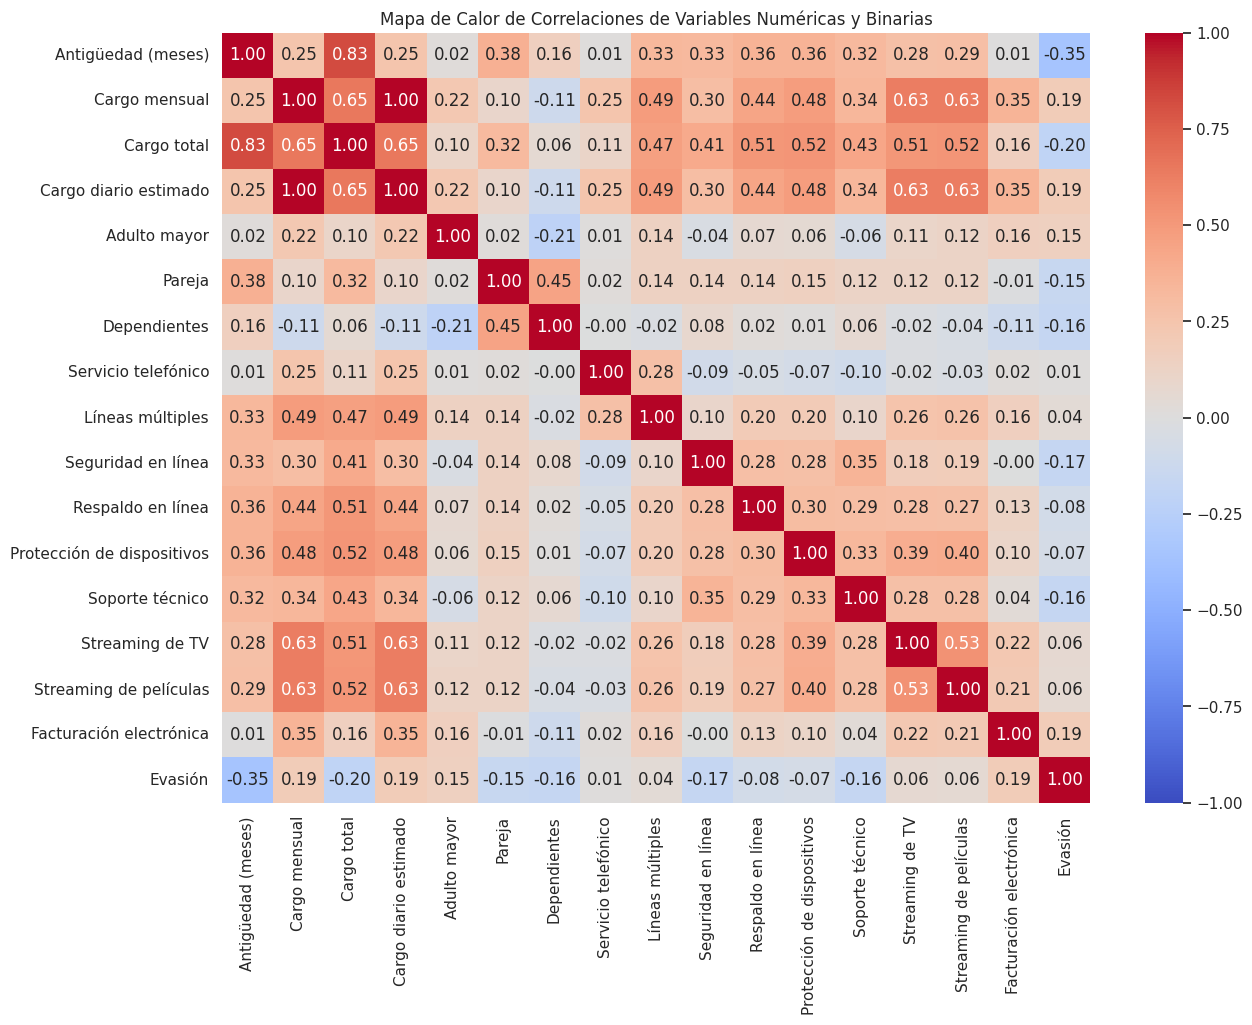

In [20]:
numeric_cols_for_corr = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'account.Charges.Daily', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents',
                         'phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport',
                         'internet.StreamingTV', 'internet.StreamingMovies', 'account.PaperlessBilling', 'Churn']

corr_matrix = datos[numeric_cols_for_corr].corr()
corr_matrix = corr_matrix.rename(columns=etiquetas, index=etiquetas, errors='ignore')

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Mapa de Calor de Correlaciones de Variables Numéricas y Binarias')
plt.show()

### 2. Evasión general.


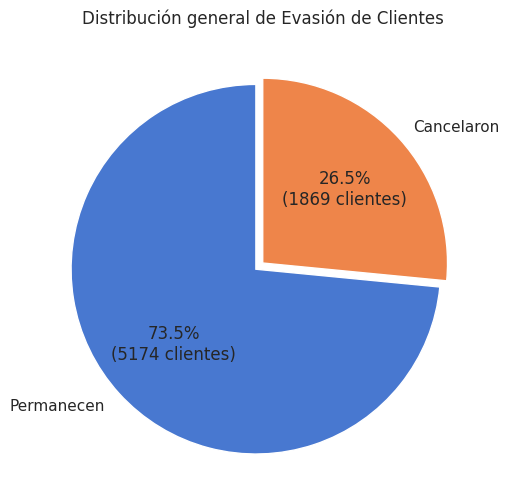

In [21]:
churn_counts = df_vis['Churn'].value_counts().reset_index()
churn_counts.columns = ['Evasión', 'Cantidad de clientes']

explode = (0.05, 0)  # Separar la primera porción (Cancelaron) ligeramente

plt.figure(figsize=(6, 6))
plt.pie(churn_counts['Cantidad de clientes'], labels=churn_counts['Evasión'], autopct=lambda pct: '{:.1f}%\n({:.0f} clientes)'.format(pct, pct/100.*sum(churn_counts['Cantidad de clientes'])), startangle=90, colors=sns.color_palette('muted')[0:len(churn_counts)], explode=explode)
plt.title('Distribución general de Evasión de Clientes')
plt.show()

### 3. Evasión por características personales: Género, Adulto mayor de 65 años, Estatus de relación y Dependientes.

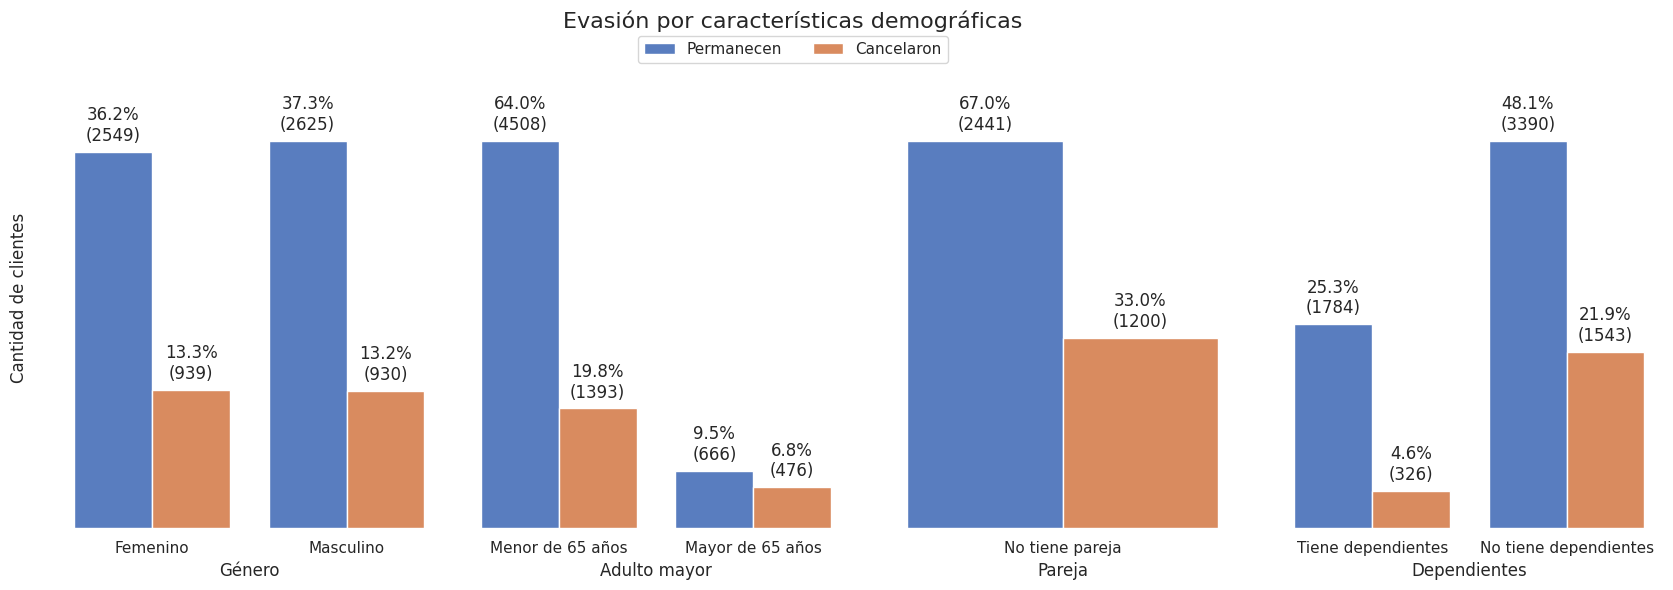

In [22]:
plot_churn_by_category(df_vis, columnas_customer, 'Evasión por características demográficas', labels=etiquetas)

### 4. Evasión por servicios de intenet.

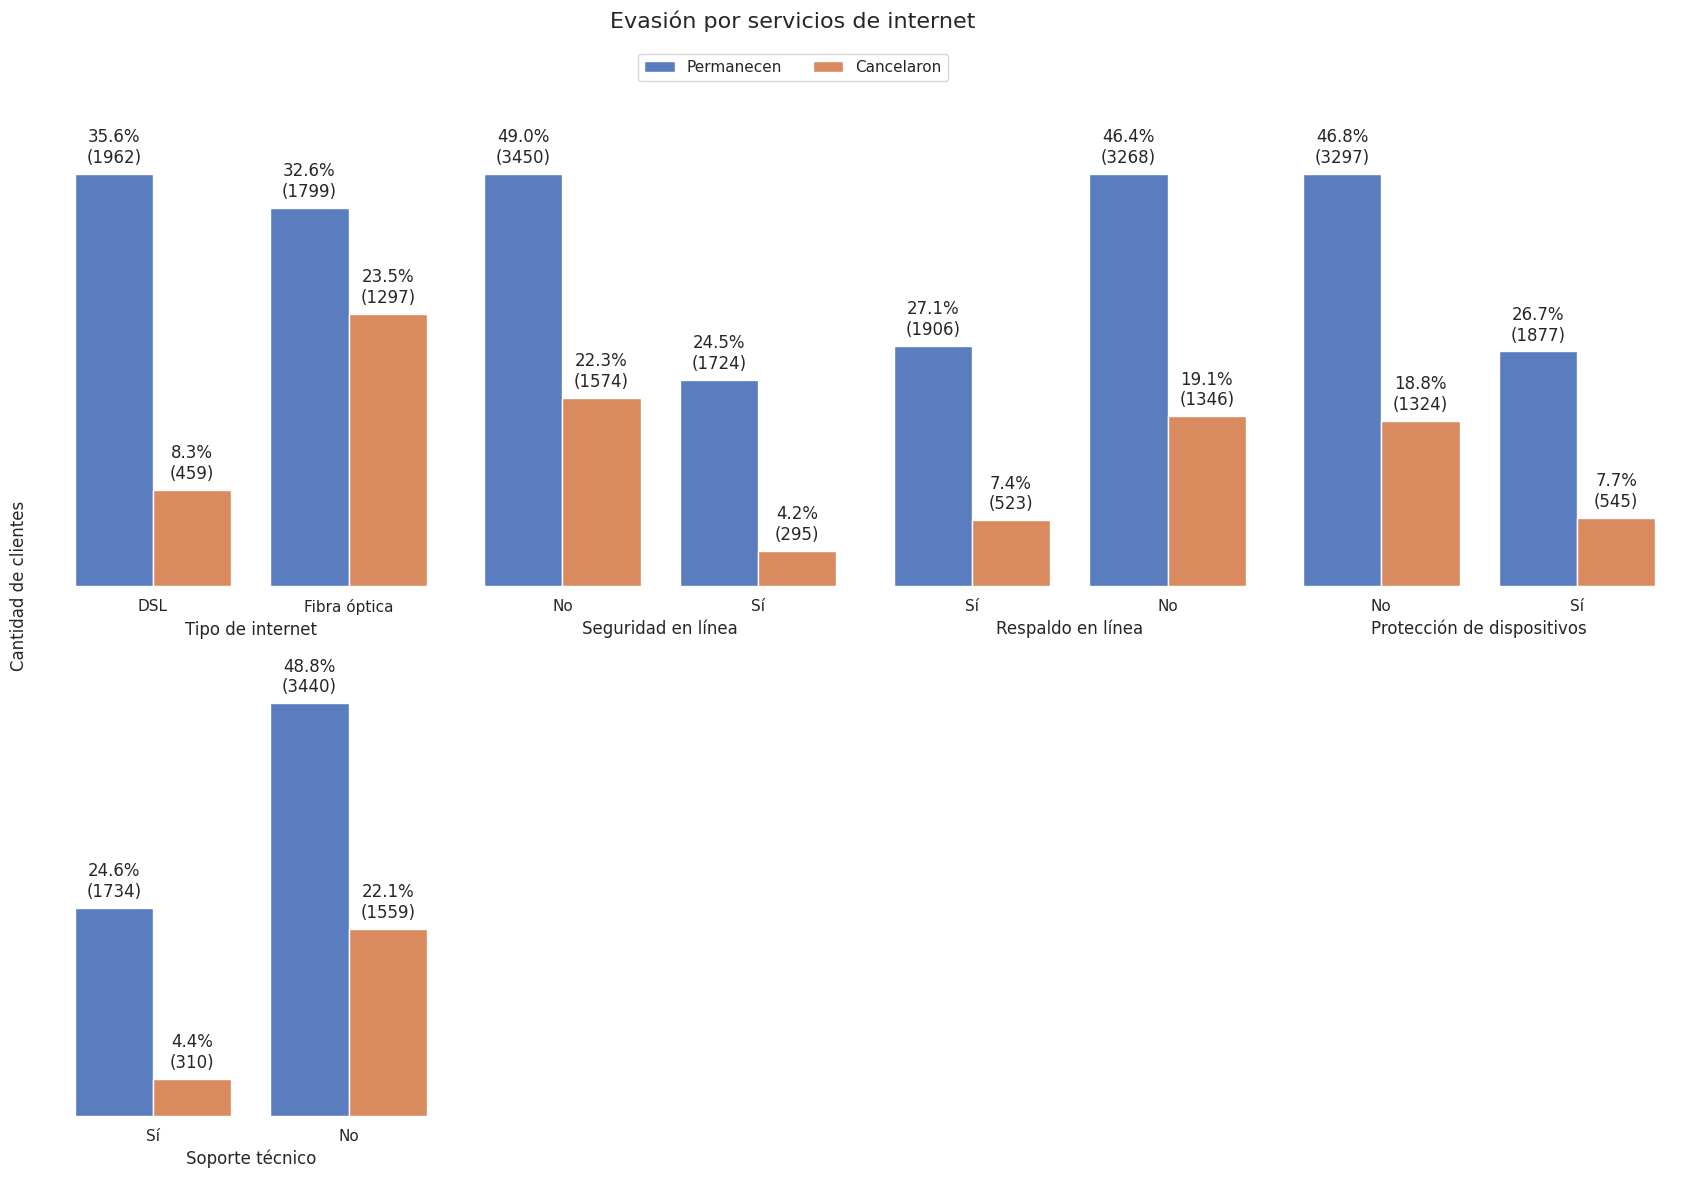

In [23]:
plot_churn_by_category(df_vis, columnas_internet_sin_streaming, 'Evasión por servicios de internet', labels=etiquetas)

### 5. Evasión por servicios de Streaming

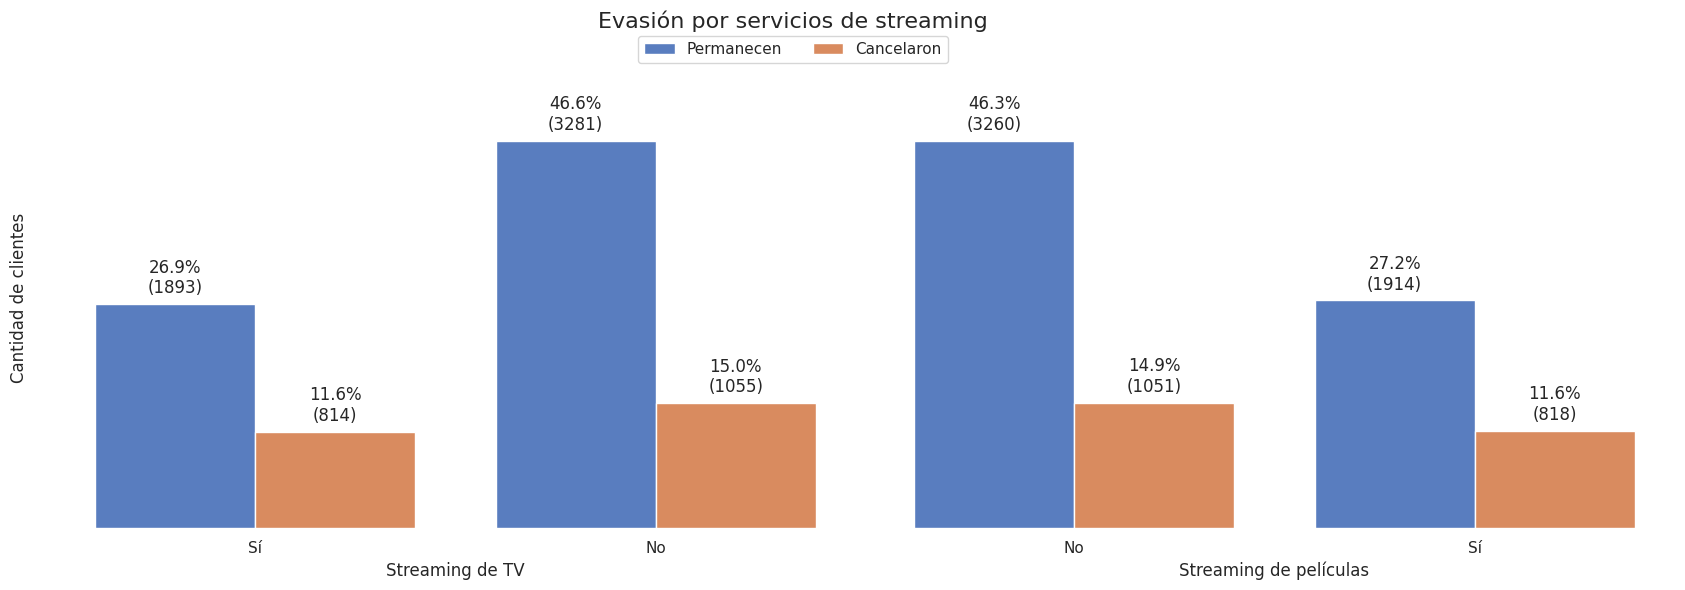

In [24]:
plot_churn_by_category(df_vis, columnas_streaming, 'Evasión por servicios de streaming', labels=etiquetas)

### 6. Evasión por Cuentas.

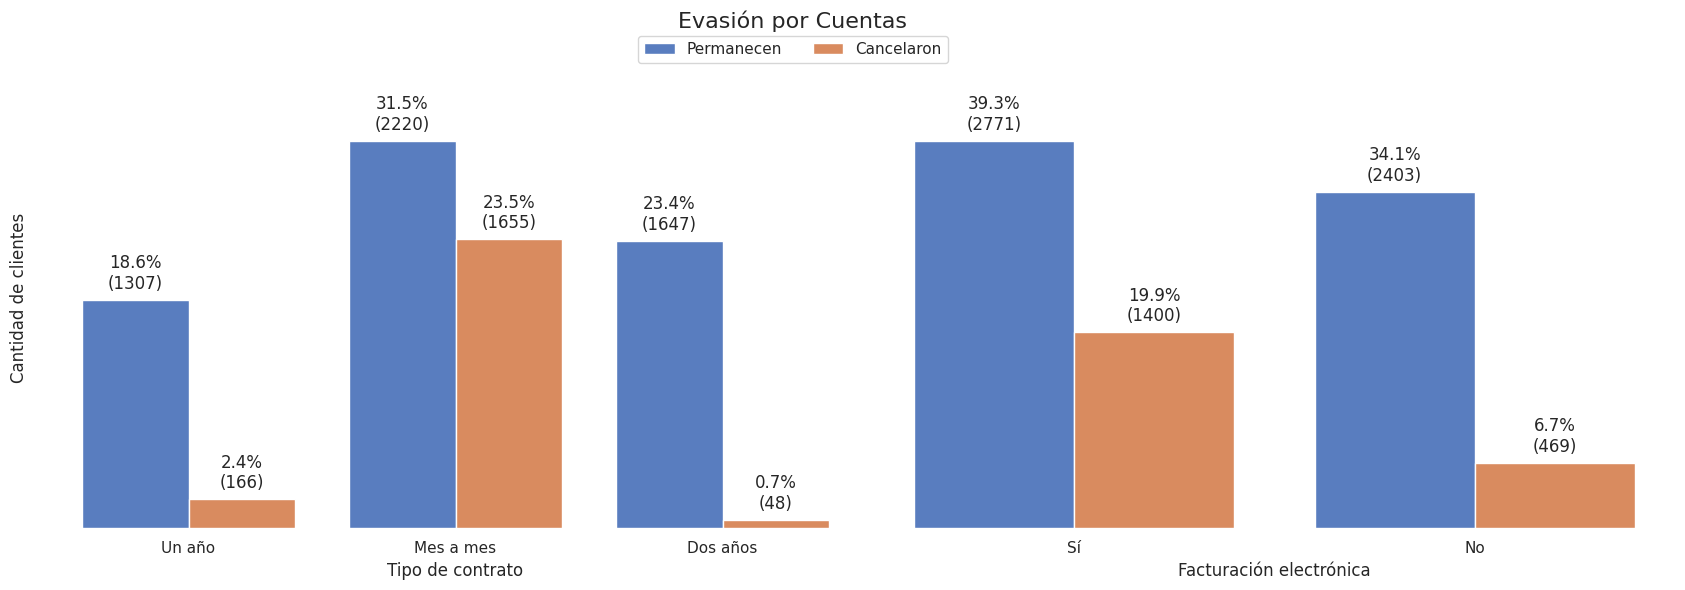

In [25]:
plot_churn_by_category(df_vis, columnas_tipo_cuenta, 'Evasión por Cuentas', labels=etiquetas)

### 7. Evasión por Tipo de pago.

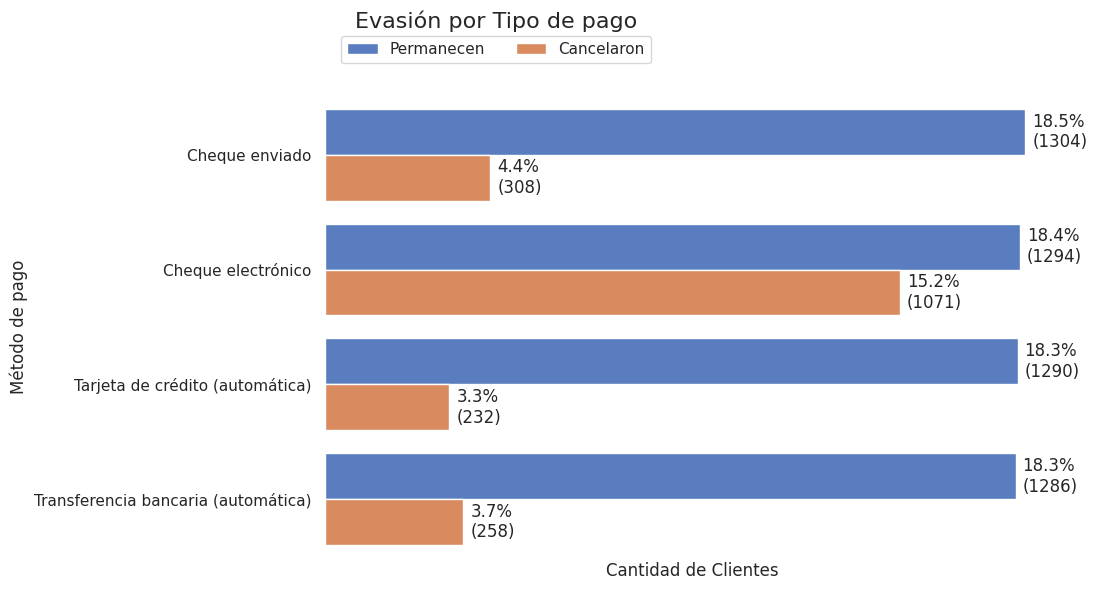

In [26]:
plot_churn_by_category(df_vis, ['account.PaymentMethod'], 'Evasión por Tipo de pago', labels=etiquetas)

### 8. Evasión con la Antigüedad.

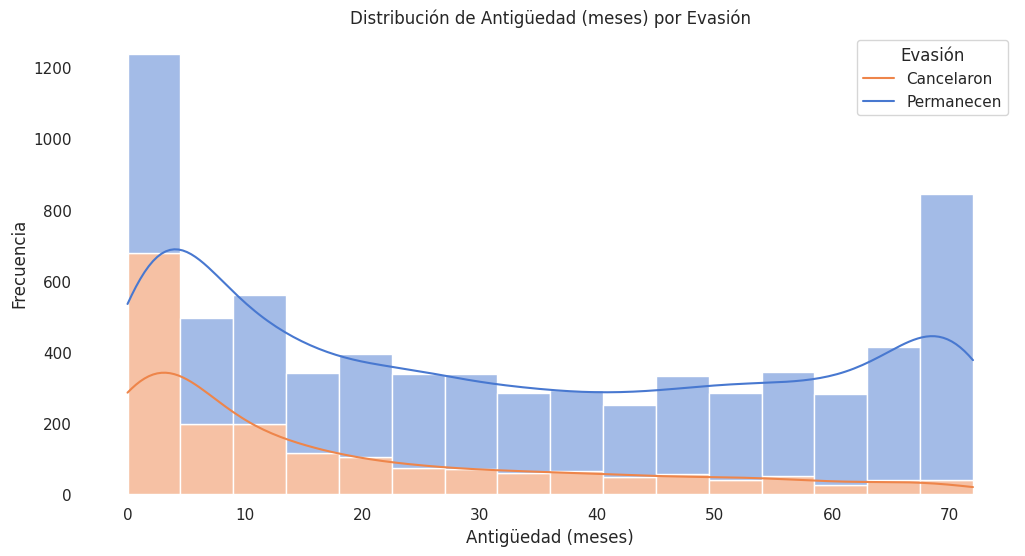

In [27]:
plot_distribution_by_churn(df_vis, 'customer.tenure', labels=etiquetas)

### 9. Evasión por Cargos mensuales.

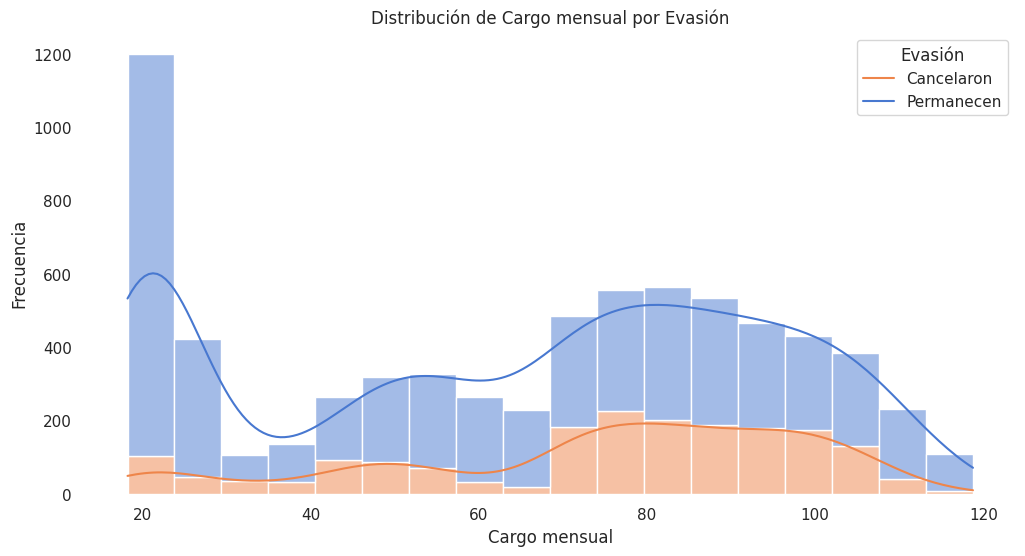

In [28]:
plot_distribution_by_churn(df_vis, 'account.Charges.Monthly', labels=etiquetas)

### 10. Evasión por Cargos totales.

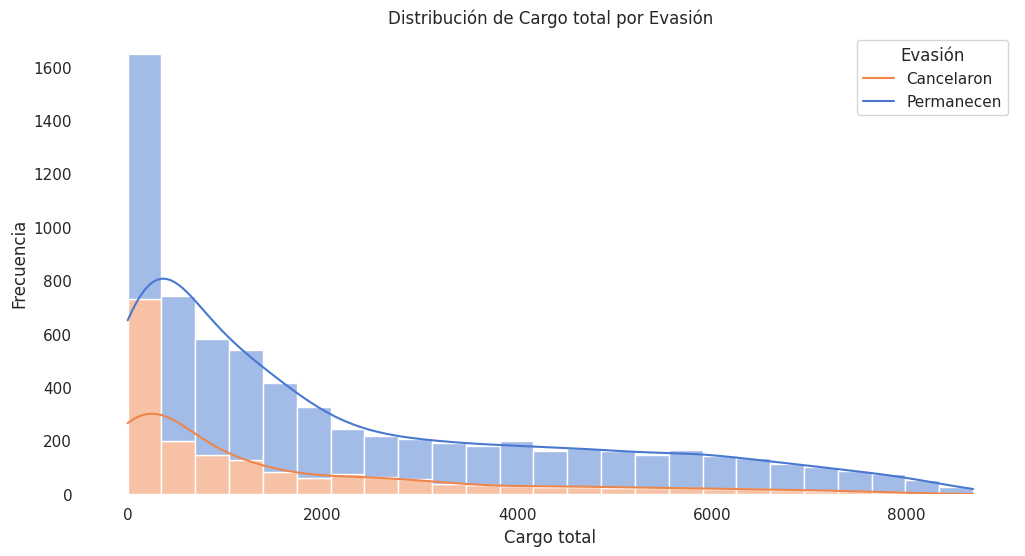

In [29]:
plot_distribution_by_churn(df_vis, 'account.Charges.Total', labels=etiquetas)

#📄Informe final

# Análisis de Evasión de clientes - Conclusiones

## Conclusiones principales:

* Hay una evasión del 26.5 %

* El género no es un factor importante.

*  **Tipo de Contrato es el factor más crítico:** Los clientes con un contrato **mes a mes** tienen una tasa de abandono drásticamente mayor que aquellos con contratos a uno o dos años. La flexibilidad de este tipo de contrato facilita que los clientes dejen el servicio.

*  **La Antigüedad (Tenure) es clave para la lealtad:** La tasa de abandono es significativamente más alta en clientes nuevos (con pocos meses de antigüedad). A medida que aumenta la permanencia del cliente en la compañía, la probabilidad de que se vaya disminuye considerablemente.

*  **El Servicio de Internet de Fibra Óptica tiene una alta Tasa de evasión:** Aunque la fibra óptica es un servicio premium, los clientes que lo tienen contratado muestran una mayor propensión a cancelar. Esto podría indicar problemas de precio, calidad del servicio o una competencia más agresiva en este segmento.

*  **Métodos de Pago y Facturación influyen en la decisión:** Los clientes que utilizan el **cheque electrónico** como método de pago tienen una tasa de abandono mucho más alta. Por otro lado, aquellos con facturación sin papel también son más propensos a irse.

*  **Servicios adicionales como factor de retención:** Clientes que no cuentan con servicios de valor agregado como `Seguridad en línea`, `Respaldo en línea`, `Protección de dispositivos` y `Soporte técnico` tienden a cancelar su suscripción con mayor frecuencia. Estos servicios parecen aumentar la dependencia y satisfacción del cliente.

## Recomendaciones estratégicas:

*   **Incentivar Contratos a largo plazo:** Crear campañas y ofertas especiales para migrar a los clientes de contratos mes a mes hacia planes de uno o dos años. Ofrecer descuentos o beneficios exclusivos puede ser una estrategia efectiva.

*   **Fortalecer la experiencia inicial (Onboarding):** Implementar un programa de seguimiento y soporte proactivo para los clientes durante sus primeros 3 a 6 meses, que es el período más crítico de abandono.

*   **Revisar la oferta de Fibra Óptica:** Investigar las causas específicas de la alta tasa de abandono en clientes de fibra óptica. Esto podría incluir encuestas de satisfacción, análisis de la competencia en cuanto a precios y revisión de la calidad técnica del servicio.

*   **Promover Métodos de Pago Automáticos:** Incentivar a los clientes a cambiar el pago por cheque electrónico por métodos automáticos como la tarjeta de crédito o la transferencia bancaria, que están asociados con una menor tasa de abandono.

*   **Venta cruzada de servicios de valor agregado:** Desarrollar paquetes y ofertas para que los clientes, especialmente aquellos con solo internet de fibra óptica, contraten servicios adicionales de seguridad y soporte técnico, lo cual ha demostrado ser un factor importante de retención.
